# Séries de tempo 

### 0. Algumas referências:

<p>Aulas/Palestras:</p>
 - <a href="https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/video-lectures/">MIT Open Course</a><br>
 - <a href="https://www.youtube.com/watch?v=v5ijNXvlC5A&t=2643s">Modern Time Series Analysis | SciPy 2019 Tutorial | Aileen Nielsen</a><br><br>
<p>Livros:</p>
 - <a href="https://www.amazon.com.br/Practical-Time-Analysis-Aileen-Nielsen/dp/1492041653/ref=asc_df_1492041653/?tag=googleshopp00-20&linkCode=df0&hvadid=379795170134&hvpos=&hvnetw=g&hvrand=14204941210051391738&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001768&hvtargid=pla-575006547733&psc=1">Practical Time Series Analysis: Prediction with Statistics and Machine </a><br>
 - <a href="https://www.amazon.com.br/An%C3%A1lise-S%C3%A9ries-Temporais-Lineares-Univariados/dp/8521213514/ref=asc_df_8521213514/?tag=googleshopp00-20&linkCode=df0&hvadid=379712528301&hvpos=&hvnetw=g&hvrand=14502261665275545713&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=20106&hvlocphy=1001768&hvtargid=pla-810564891759&psc=1">Análise de Séries Temporais: Modelos Lineares Univariados (Volume 1) </a><br>

### 1. O que torna a série temporal especial?
Como o nome sugere, TS é uma coleção de pontos de dados coletados em intervalos de tempo constantes . Estes são analisados para determinar a tendência de longo prazo, de modo a prever o futuro ou realizar alguma outra forma de análise. Mas o que faz um TS diferente de dizer um problema de regressão regular? Existem duas coisas:

* É dependente do tempo . Portanto, a suposição básica de um modelo de regressão linear que as observações são independentes não vale neste caso. 
* Juntamente com uma tendência crescente ou decrescente, a maioria dos TS tem alguma forma de tendências de sazonalidade , ou seja, variações específicas de um determinado período de tempo. Por exemplo, se você ver as vendas de uma jaqueta de lã ao longo do tempo, você invariavelmente encontrará maiores vendas nas temporadas de inverno.


Por causa das propriedades inerentes de um TS, existem várias etapas envolvidas na análise. Estes são discutidos em detalhes abaixo. Vamos começar carregando um objeto TS no Python. Vamos usar um conjunto de dados do Kaggle com informações de "stock-market" de uma empresa americana chamada ABBV.

https://www.kaggle.com/jacksoncrow/stock-market-dataset

### 2. Carregando e Manipulando Séries Temporais em Pandas

O Pandas possui bibliotecas dedicadas para manipular objetos TS, particularmente a classe datatime64 [ns]  que armazena informações de tempo e nos permite executar algumas operações realmente rápidas. Vamos começar ativando as bibliotecas necessárias e fazendo nossa primeira avaliação sobre os dados:

In [1]:
# tool kit
import warnings
warnings.filterwarnings('ignore')

# algumas blibliotecas para manipulação de dados:
import math as m
import numpy as np
import pandas as pd

# algumas bibliotecas para data-viz:
import seaborn as sns
import matplotlib.pyplot as plt

# algumas bibliotecas para processamento de dados ordenados - time series:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# algumas bibliotecas para avaliação dos nossos modelos:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [2]:
# Vamos importar a base para o nosso notebook e dar uma primeira "olhada" nos dados:
ts_raw = pd.read_csv('../data/stocks_ABBV.csv', index_col=[0])

In [3]:
# Como uma primeira análise, podemos avaliar a estrutura e o meta dos nossos dados:
ts_raw.shape

(1825, 7)

In [4]:
ts_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   Open       1825 non-null   float64
 2   High       1825 non-null   float64
 3   Low        1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Adj Close  1825 non-null   float64
 6   Volume     1825 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 114.1+ KB


In [5]:
# Agora o conteúdo:
ts_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-23,85.599998,86.550003,84.900002,85.629997,78.807220,1612800
1,2013-12-24,52.779999,52.790001,52.279999,52.360001,40.406071,1747000
2,2019-12-24,90.400002,90.400002,89.430000,89.849998,88.652267,1798800
3,2017-12-28,98.190002,98.389999,97.519997,97.790001,86.620544,1870400
4,2017-12-27,97.730003,98.230003,97.440002,98.089996,86.886284,1927300


In [6]:
ts_raw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03
mean,68.060241,68.825195,67.283118,68.080729,59.006317,7.986362e+06
std,17.968276,18.197597,17.723004,17.952057,19.158059,5.719749e+06
min,33.590000,33.900002,33.330002,33.709999,25.014784,1.612800e+06
25%,55.509998,56.090000,54.680000,55.509998,44.841881,4.992500e+06
50%,64.419998,65.040001,63.880001,64.500000,53.807682,6.718600e+06
75%,80.459999,81.320000,79.690002,80.519997,75.292755,9.406300e+06
max,121.500000,125.860001,119.040001,123.209999,109.919968,1.227402e+08


In [7]:
# Vamos separar agora apenas os dados de fechamento, e estuda-la como uma série temporal
ts = ts_raw[['Date', 'Close']]
ts.head()

,Date,Close
0,2018-11-23,85.629997
1,2013-12-24,52.360001
2,2019-12-24,89.849998
3,2017-12-28,97.790001
4,2017-12-27,98.089996


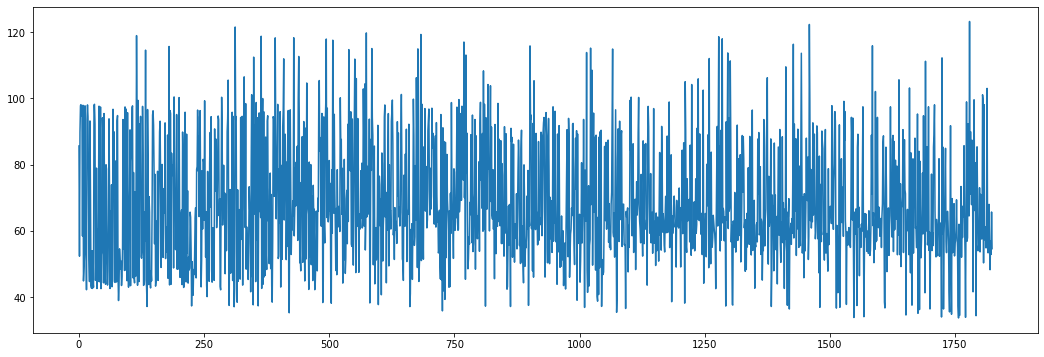

In [8]:
# Vamos ver a distribuição dos nossos dados ordenados.
plt.figure(figsize=(18, 6))
ts.Close.plot();

# Pergunta: Existe algo de errado na nossa série?

In [9]:
# Sim, existia! Vamos  arrumar nossa ordenação pela data de fechamento, e aproveitando vamos
# colocar nosso index como um "DatetimeIndex" (isso vai nos ajudar bastante na manipulação dos dados)
ts['dt'] = pd.to_datetime(ts['Date'])
ts = ts.set_index('dt')

ts.drop('Date', axis=1, inplace=True)

ts.columns = ['close']

In [10]:
ts.head()

,close
dt,
2018-11-23,85.629997
2013-12-24,52.360001
2019-12-24,89.849998
2017-12-28,97.790001
2017-12-27,98.089996


In [11]:
ts.sort_index(inplace=True)

In [12]:
ts.head()

,close
dt,
2013-01-02,35.119999
2013-01-03,34.830002
2013-01-04,34.389999
2013-01-07,34.459999
2013-01-08,33.709999


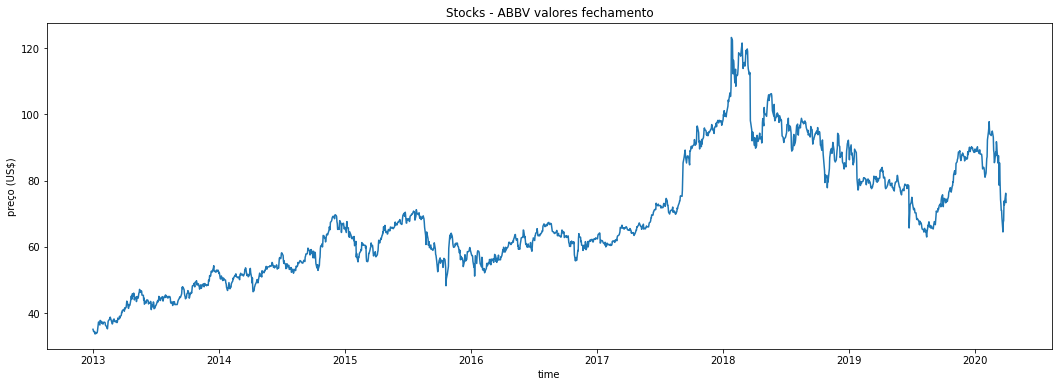

In [13]:
# Agora sim! Conseguimos começar a EDA da nossa série com mais segurança!

# Vamos ver sua distribuição real!
plt.figure(figsize=(18, 6))
plt.plot(ts)

plt.title('Stocks - ABBV valores fechamento')
plt.ylabel('preço (US$)')
plt.xlabel('time');

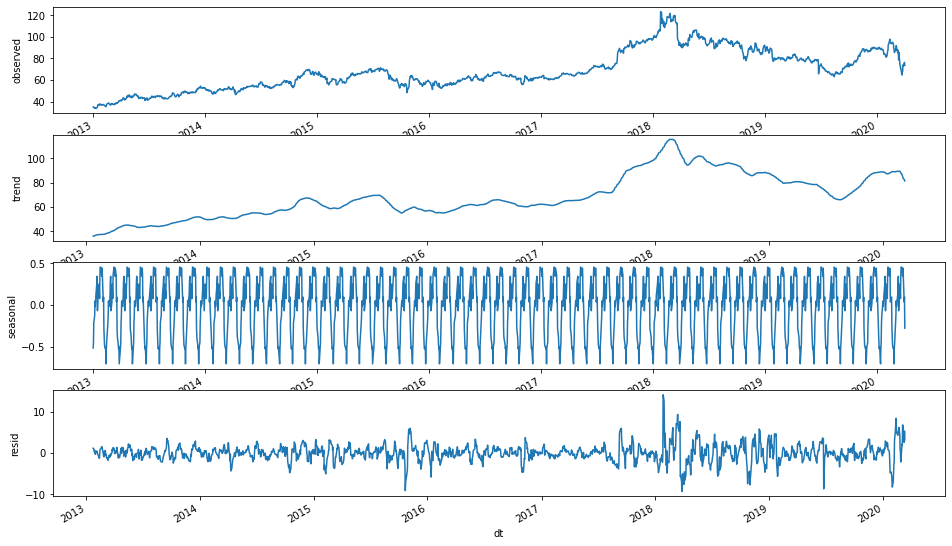

In [14]:
# Vamos realizar uma decomposição aditiva da nossa série, e estudar sua tendência, sazonalidade e resíduo.
decomposition = seasonal_decompose(ts, freq=30)

fig, ax = plt.subplots(4, 1, figsize=(16, 10))
decomposition.observed.plot(ax=ax[0]); ax[0].set_ylabel('observed')
decomposition.trend.plot(ax=ax[1]); ax[1].set_ylabel('trend')
decomposition.seasonal.plot(ax=ax[2]); ax[2].set_ylabel('seasonal')
decomposition.resid.plot(ax=ax[3]); ax[3].set_ylabel('resid');

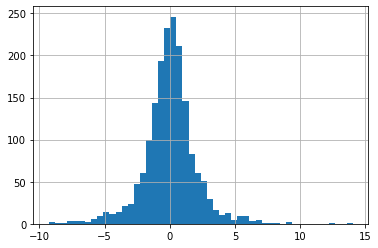

In [15]:
# Vamos analisar a componente de resíduo com um pouco mais de cuidado:
decomposition.resid.hist(bins=50);

É claramente evidente que há uma tendência geral crescente nos dados, juntamente com algumas variações sazonais. No entanto, nem sempre é possível fazer tais inferências visuais. Então, mais formalmente, podemos verificar a estacionariedade usando o seguinte:

- **Plotando Rolando Estatísticas**: Podemos traçar a média móvel ou variância móvel e ver se varia com o tempo. Ao mover a média / variância, quero dizer que, em qualquer instante, 't', consideraremos a média / variância de um dado período, por exemplo o último ano, isto é, os últimos 12 meses. Mas, novamente, isso é mais uma técnica visual.


- **Teste Dickey-Fuller**: Este é um dos testes estatísticos para verificar a estacionariedade. Aqui a hipótese nula é que o TS é não-estacionário. Os resultados do teste compreendem uma estatística de teste e alguns  valores críticos para os níveis de confiança de diferença. Se a estatística de teste for menor que o valor crítico, podemos rejeitar a hipótese nula e dizer que a série é estacionária.

Esses conceitos podem não parecer muito intuitivos neste momento. Eu recomendo passar pelo artigo prequel. Se você estiver interessado em alguma estatística teórica, você pode consultar Introdução a Séries Temporais e Previsão  por Brockwell e Davis . O livro é um pouco pesado para as estatísticas, mas se você tiver a habilidade de ler as entrelinhas, poderá entender os conceitos e tangenciar as estatísticas tangencialmente.

De volta à verificação da estacionariedade, usaremos muito os gráficos estatísticos de rolagem juntamente com os resultados do teste Dickey-Fuller, de modo que defini uma função que recebe um TS como entrada e os gerou para nós.

In [16]:
# funções:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # ADF Test
    result = adfuller(timeseries, autolag='AIC')

    print('Augmented Dickey Fuller test (ADH Test)')
    print('='*40)
    print(f'ADF Statistic: {result[0]:>24}')
    print('-'*40)
    print(f'p-value:       {result[1]:>24}')
    print('-'*40)
    print('Critial Values:')
    print('-'*40)
    for key, value in result[4].items():
        print(f'{key:>4} :{value:>33}')
    print('='*40)

### 4. Como fazer uma série temporal estacionária?

Embora a suposição de estacionariedade seja tomada em muitos modelos TS, quase nenhuma das séries temporais práticas é estacionária. Então, os estatísticos descobriram maneiras de tornar as séries estacionárias, o que discutiremos agora. Na verdade, é quase impossível fazer uma série perfeitamente estacionária, mas tentamos levá-la o mais perto possível. Vamos entender o que está tornando um TS não estacionário. Existem duas razões principais por trás do não estacionarista de um TS: 

- 1. Tendência - variação média ao longo do tempo. Por exemplo, neste caso, vimos que, em média, o número de passageiros estava crescendo com o tempo. 
- 2. Sazonalidade - variações em intervalos de tempo específicos. Por exemplo, as pessoas podem ter a tendência de comprar carros em um determinado mês devido ao aumento de salário ou festivais.


O princípio subjacente é modelar ou estimar a tendência e a sazonalidade da série e removê-la da série para obter uma série estacionária. Em seguida, as técnicas de previsão estatística podem ser implementadas nesta série. A etapa final seria converter os valores previstos na escala original aplicando as restrições de tendência e sazonalidade. Nota: discutirei vários métodos. Alguns podem funcionar bem neste caso e outros não. Mas a ideia é pegar um jeito de todos os métodos e não focar apenas no problema em questão. Vamos começar trabalhando na parte da tendência. 

### Estimando e eliminando tendências 

Um dos primeiros truques para reduzir a tendência pode ser a transformação. Por exemplo, neste caso, podemos ver claramente que há uma tendência positiva significativa. Assim, podemos aplicar transformações que penalizam valores mais altos do que valores menores. Estes podem ser um log, raiz quadrada, raiz cúbica, etc. Vamos pegar uma transformação log aqui para simplificar:

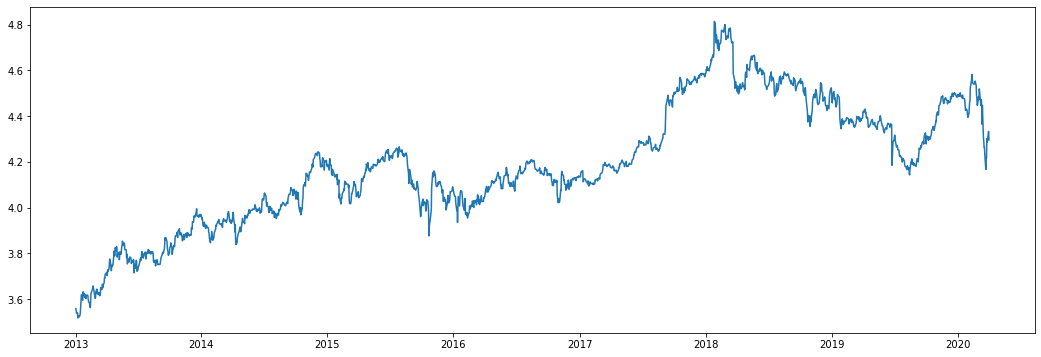

In [17]:
# Vamos tentar eliminar essa "Não estacionariedade" considerando o Log da nossa ts
plt.figure(figsize=(18, 6))
ts_log = np.log(ts)
plt.plot(ts_log);

# Deu certo?

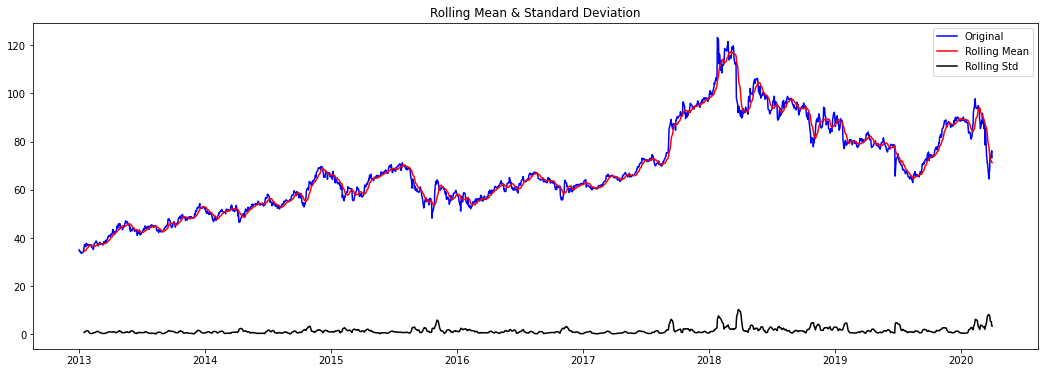

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:      -2.0682022025309257
----------------------------------------
p-value:            0.25749132839722355
----------------------------------------
Critial Values:
----------------------------------------
  1% :               -3.433972018026501
  5% :              -2.8631399192826676
 10% :              -2.5676217442756872


In [18]:
# Vamos testar!
plt.figure(figsize=(18, 6))
test_stationarity(ts)

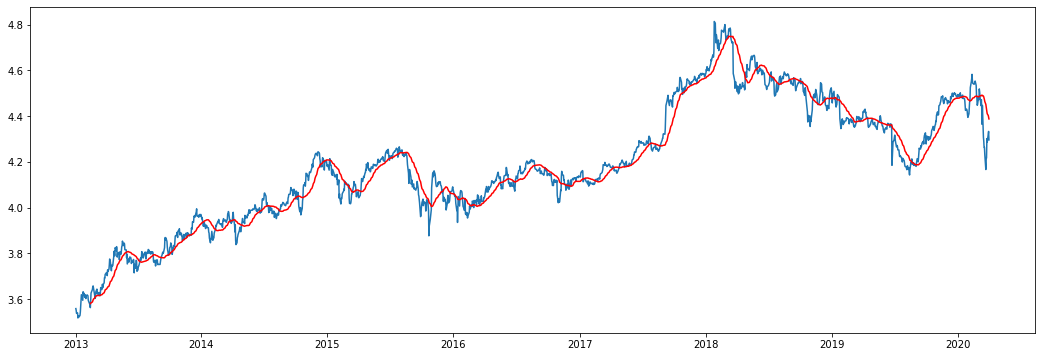

In [19]:
# Vamos analiar a MA dessa série:
plt.figure(figsize=(18, 6))
moving_avg = ts_log.rolling(30).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red');

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

,close
dt,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
2013-01-08,NaN


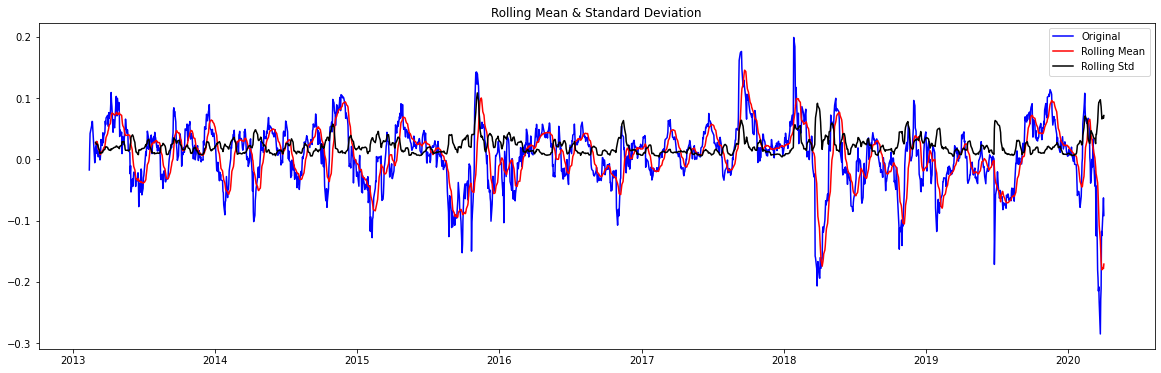

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:       -7.765996037969756
----------------------------------------
p-value:          9.185055595463233e-12
----------------------------------------
Critial Values:
----------------------------------------
  1% :              -3.4340332205127657
  5% :              -2.8631669370039785
 10% :               -2.567636130407771


In [21]:
# Removendo agora o efeito de têndencia e "variação" da variância
plt.figure(figsize=(20, 6))
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

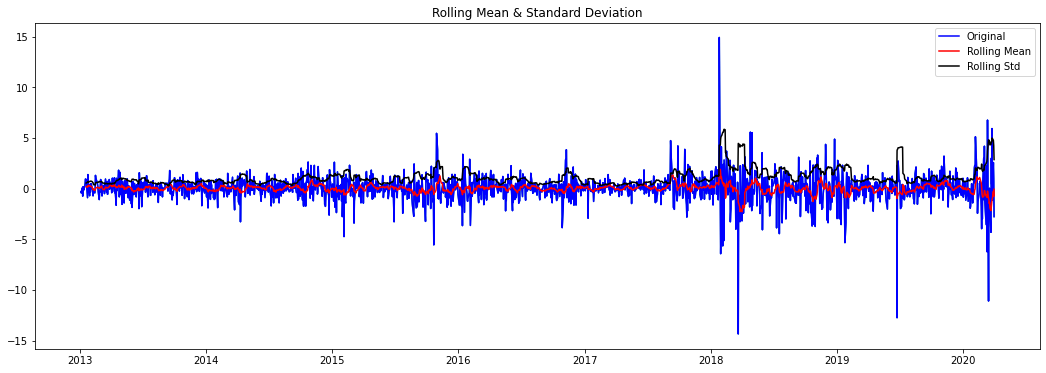

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:       -9.865671125326017
----------------------------------------
p-value:          4.120452820857101e-17
----------------------------------------
Critial Values:
----------------------------------------
  1% :               -3.433972018026501
  5% :              -2.8631399192826676
 10% :              -2.5676217442756872


In [22]:
# Outra maneira é fazer a difereniação dessa série, ou seja, seu valor atual menos o valor anterior:
plt.figure(figsize=(18, 6))
ts_sft = ts - ts.shift()
plt.plot(ts_sft)
test_stationarity(ts_sft.dropna())

### Forecasting

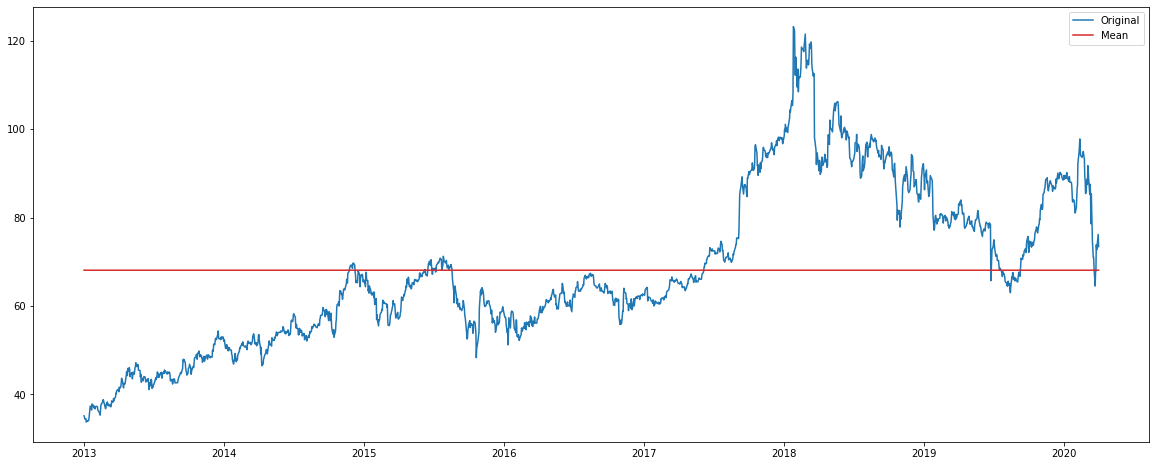

In [23]:
# Vamos começar a estudar algumas primeiras estimativas para nossa série:

# Será q a média consegue descrever bem nossa distribuição?
plt.figure(figsize=(20, 8))
plt.plot(ts, color='C0',label='Original')
plt.plot(ts.index, [ts.close.mean() for _ in ts.index], label=f'Mean', c='C03');
plt.legend();

In [24]:
ts['order'] = range(ts.shape[0])

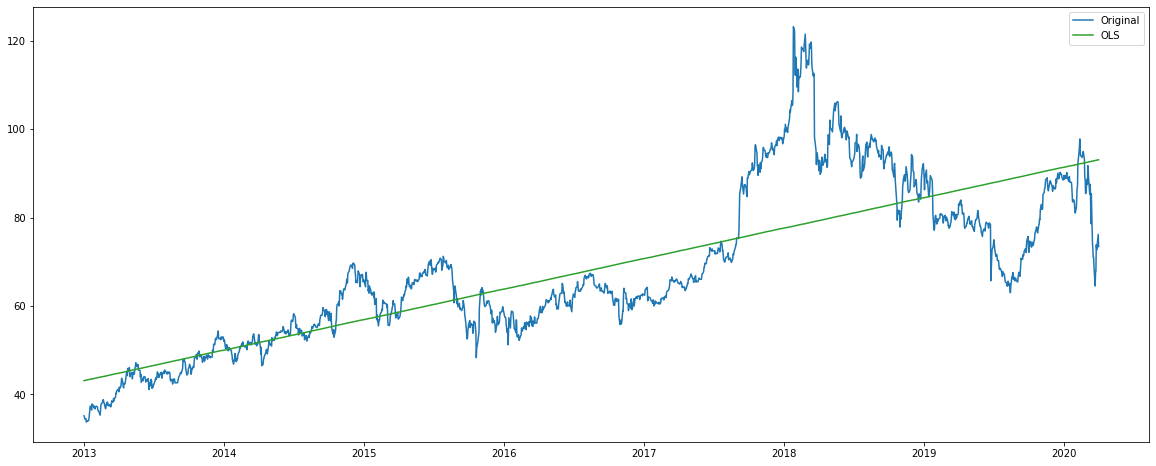

In [25]:
# talvez uma rendência mais determinística..
from sklearn.linear_model import LinearRegression

ts['order'] = range(ts.shape[0])
reg = LinearRegression().fit(ts[['order']], ts.close)

plt.figure(figsize=(20, 8))
plt.plot(ts.close, color='C0',label='Original')
plt.plot(ts.index, reg.predict(ts[['order']]), label=f'OLS', c='C02')
plt.legend();

# Funcionou?

In [26]:
ts = ts[['close']]
ts.head()

,close
dt,
2013-01-02,35.119999
2013-01-03,34.830002
2013-01-04,34.389999
2013-01-07,34.459999
2013-01-08,33.709999


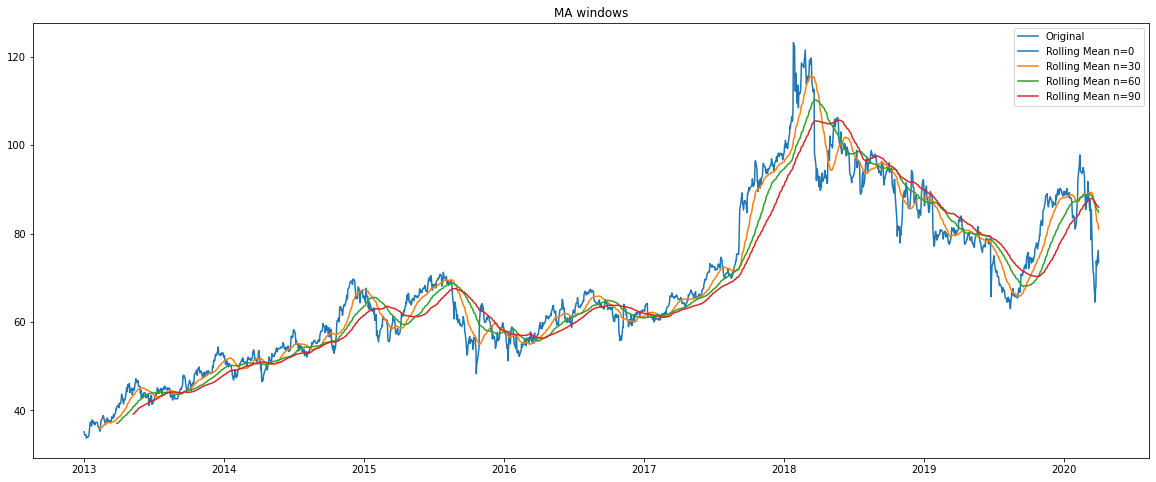

In [27]:
# Então vamos tentar uma suavização.. ou suavizações!
plt.figure(figsize=(20, 8))
plt.plot(ts, color='C0',label='Original')
for i in range(0, 100, 30):
    
    rolmean = ts.rolling(i).mean()

    #Plot rolling statistics:
    plt.plot(rolmean, label=f'Rolling Mean n={i}')

plt.legend(loc='best')
plt.title('MA windows')
plt.show(block=False)

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


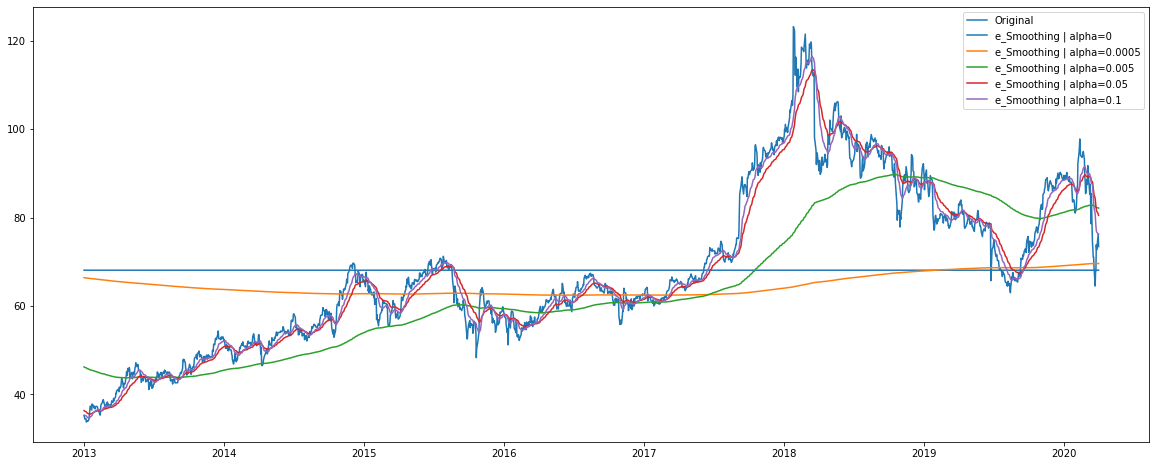

In [29]:
# create class
model = SimpleExpSmoothing(ts)

plt.figure(figsize=(20, 8))
plt.plot(ts.close, color='C0',label='Original')

for alpha in [0, .0005, .005, .05, .1]:
    
    # fit model
    model_fit = model.fit(alpha)
    # make prediction
    yhat = model_fit.predict(ts.index.min(), ts.index.max())

    plt.plot(ts.index, yhat, label=f'e_Smoothing | alpha={alpha}')

plt.legend()

### Familia ARIMA

Deixe-me dar uma breve introdução ao ARIMA . Não vou entrar nos detalhes técnicos, mas você deve entender esses conceitos detalhadamente se quiser aplicá-los com mais eficiência. ARIMA significa Médias Móveis Integradas Auto-Regressivas . A previsão ARIMA para uma série temporal estacionária nada mais é que uma equação linear (como uma regressão linear). Os preditores dependem dos parâmetros (p, d, q) do modelo ARIMA:


Algumas palavras sobre o modelo. Letra por letra, construiremos o nome completo - ARIMA (p, d, q).


- **AR (p)** - modelo de autorregressão, isto é, regressão da série temporal em si. Premissa básica - os valores da série atual dependem de seus valores anteriores com algum atraso (ou várias defasagens). O atraso máximo no modelo é referido como p. Para determinar o p inicial. (em econometria analisamos um grafico chamado PACF para anlisar o p, em machine learning faremos via grid search).

- ** MA (q)** - modelo de média móvel. Sem entrar em detalhes, modela o erro da série temporal, novamente a suposição é - o erro atual depende do anterior com algum atraso, que é referido como q. (em econometria usamos o grafico ACF).

Vamos fazer uma pequena pausa e combinar as primeiras 4 letras:

**AR(p) + MA(q) = ARMA(p,q)**

O que temos aqui é o modelo de médio movimento autorregressivo! Se a série é estacionária, pode ser aproximada com essas 4 letras. Devemos continuar?

- **I(d)**— ordem de integração. É simplesmente o número de diferenças não sazonais necessárias para tornar a série estacionária. Como a ideia de estacionariedade é razoavelmente complicada para essa introdução, vamos defini-la apenas como uma curva "bem comportada", que em séries temporais seria algo não explosivo, com variância constante e sazonalidade constante.

**AR(p) + I(d) + MA(q) = ARIMA(p,d,q)**

Há outros filtros como o S de sazonal e outras formas funcionais como o VAC e o VEC e até modelos que preevem volatidade (muito usado no mercado financeiro) como os GARCH. Aqui ficaremos no mais simples.


Uma preocupação importante aqui é como determinar o valor de 'p' e 'q'. Nós usamos dois gráficos para determinar esses números. Vamos discuti-los primeiro.

**Função de Autocorrelação (ACF)**: É uma medida da correlação entre o TS com uma versão defasada de si mesmo. Por exemplo, no intervalo 5, o ACF compararia as séries no instante de tempo 't1' ... 't2' com as séries no instante 't1-5'… 't2-5' (t1-5 e t2 sendo pontos finais).


**Função de Autocorrelação Parcial (PACF)**: Mede a correlação entre a TS com uma versão defasada de si mesma, mas depois elimina as variações já explicadas pelas comparações intervenientes. Por exemplo, no lag 5, ele verificará a correlação, mas removerá os efeitos já explicados pelos lags 1 a 4.

In [30]:
model_empty = ARIMA(ts, order=(0, 0, 0)).fit()
print(model_empty.summary())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1825
Model:                     ARMA(0, 0)   Log Likelihood               -7859.124
Method:                           css   S.D. of innovations             17.947
Date:                Fri, 16 Apr 2021   AIC                          15722.247
Time:                        18:53:32   BIC                          15733.266
Sample:                             0   HQIC                         15726.312
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.0807      0.420    162.054      0.000      67.257      68.904


/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


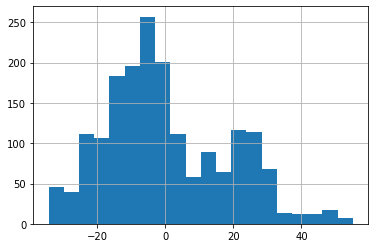

In [46]:
model_empty.resid.hist(bins=20);

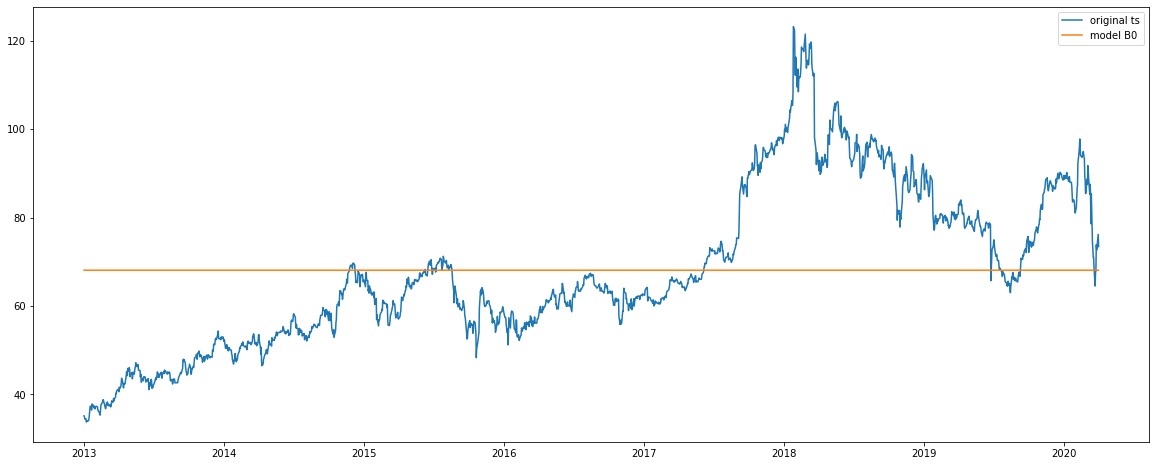

In [32]:
plt.figure(figsize=(20, 8))

plt.plot(ts, label='original ts')
plt.plot(model_empty.predict(), label='model B0')
plt.legend();

In [33]:
model_ma = ARIMA(ts, order=(0, 0, 1)).fit()
print(model_ma.summary())

/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1825
Model:                     ARMA(0, 1)   Log Likelihood               -6675.729
Method:                       css-mle   S.D. of innovations              9.377
Date:                Fri, 16 Apr 2021   AIC                          13357.458
Time:                        18:53:32   BIC                          13373.986
Sample:                             0   HQIC                         13363.555
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          68.0736      0.430    158.371      0.000      67.231      68.916
ma.L1.close     0.9587      0.005    199.404      0.000       0.949       0.968
                                    Roots       

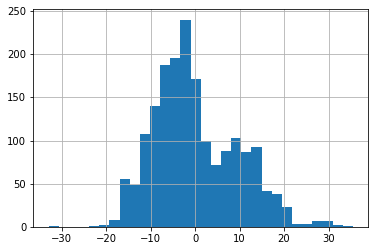

In [34]:
model_ma.resid.hist(bins=30);

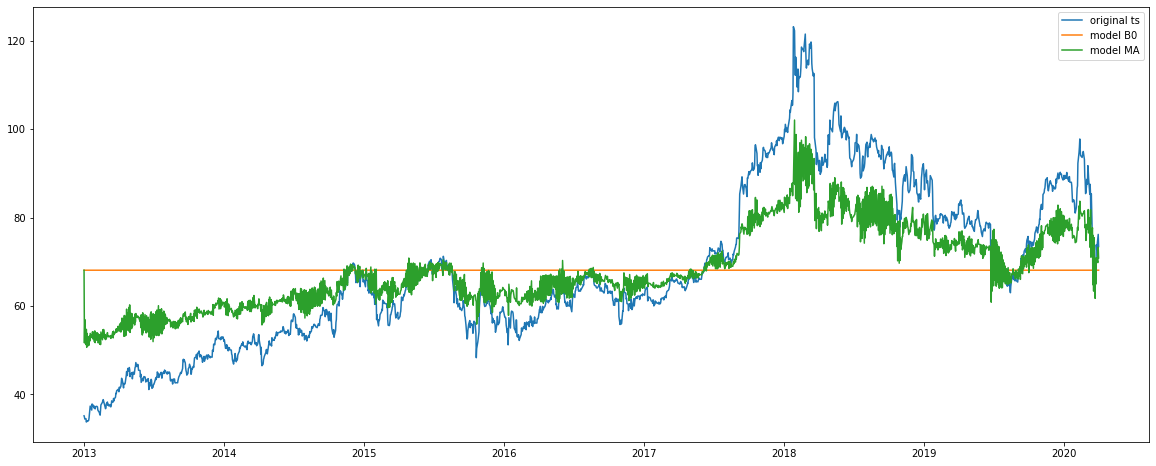

In [35]:
plt.figure(figsize=(20, 8))

plt.plot(ts, label='original ts')
plt.plot(model_empty.predict(), label='model B0')
plt.plot(model_ma.predict(), label='model MA')
plt.legend();

In [36]:
model_ar = ARIMA(ts, order=(3, 0, 0)).fit()
print(model_ar.summary())

/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1825
Model:                     ARMA(3, 0)   Log Likelihood               -3136.802
Method:                       css-mle   S.D. of innovations              1.348
Date:                Fri, 16 Apr 2021   AIC                           6283.605
Time:                        18:53:33   BIC                           6311.152
Sample:                             0   HQIC                          6293.766
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          63.8033     10.762      5.929      0.000      42.710      84.896
ar.L1.close     1.0093      0.023     43.113      0.000       0.963       1.055
ar.L2.close    -0.0392      0.033     -1.179    

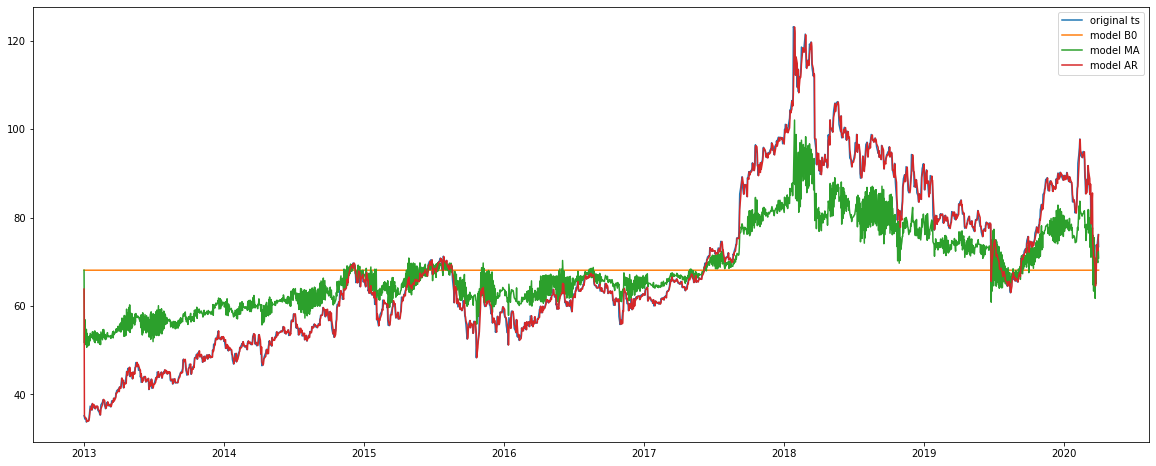

In [37]:
plt.figure(figsize=(20, 8))

plt.plot(ts, label='original ts')
plt.plot(model_empty.predict(), label='model B0')
plt.plot(model_ma.predict(), label='model MA')
plt.plot(model_ar.predict(), label='model AR')
plt.legend();

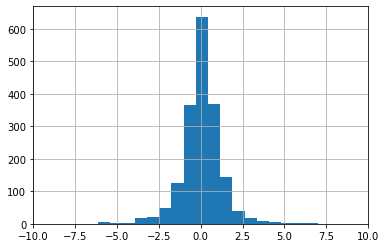

In [38]:
model_ar.resid.hist(bins=60)
plt.xlim(-10, 10);

In [39]:
ts_2019 = ts['2018':'2019-02']
# ts_2019 = ts_2019 - ts_2019.shift()
# ts_2019 = ts_2019.dropna()

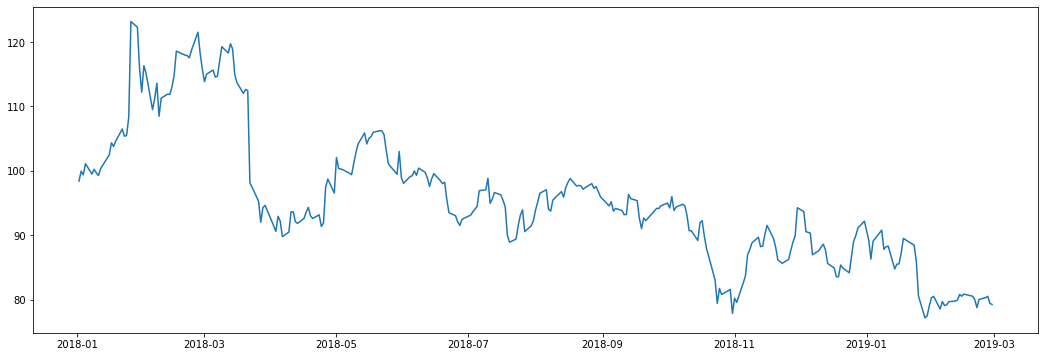

In [40]:
plt.figure(figsize=(18, 6))
plt.plot(ts_2019);

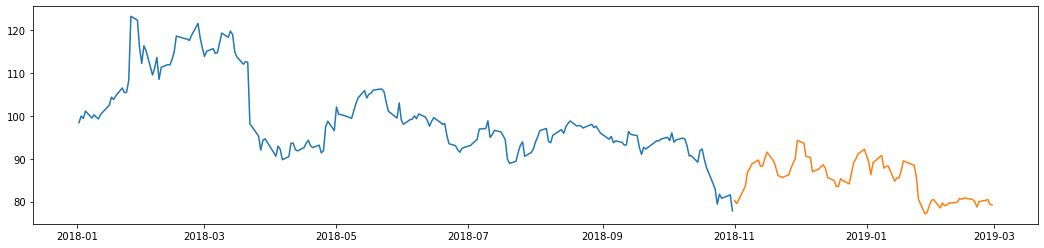

In [41]:
plt.figure(figsize=(18, 4))
plt.plot(ts_2019[:'2018-10-31'])
plt.plot(ts_2019['2018-11-01':])
plt.show();

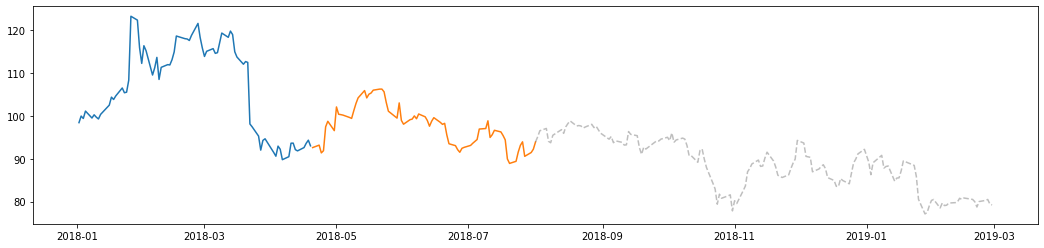

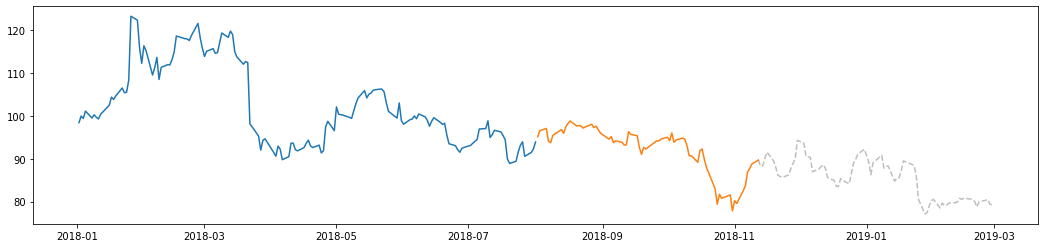

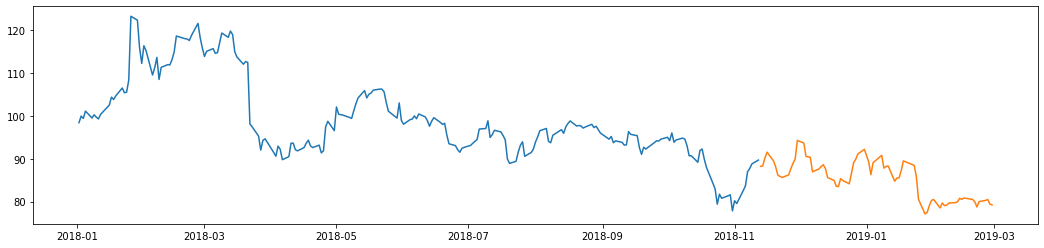

In [50]:
tscv = TimeSeriesSplit(n_splits=3) # gap=40, test_size=90, max_train_size=40
train_sets = tscv.split(ts_2019)

for train, test in train_sets: 
    
    plt.figure(figsize=(18, 4))
    plt.plot(ts_2019.iloc[train, :])
    plt.plot(ts_2019.iloc[test, :])
    plt.plot(ts_2019.iloc[train[-1]:test[0], :], color='C7', linestyle='--', alpha=.5)
    plt.plot(ts_2019.iloc[test[-1]:, :], color='C7', linestyle='--', alpha=.5)
    plt.show();

In [52]:
df_results.head()

,close,yhat
dt,,
2018-11-13,88.220001,218.996896
2018-11-14,88.309998,219.990662
2018-11-15,90.139999,220.981271
2018-11-16,91.529999,221.968699
2018-11-19,89.480003,222.952918


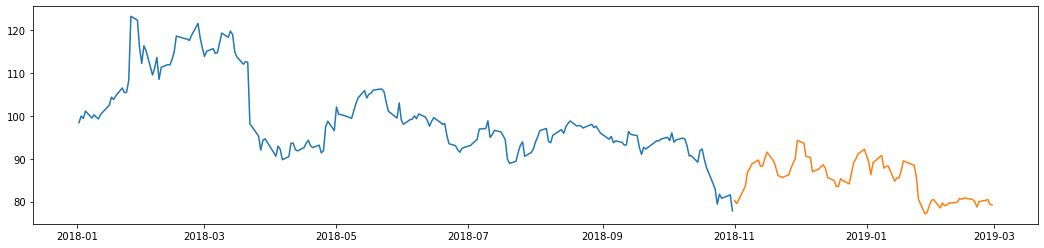

/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


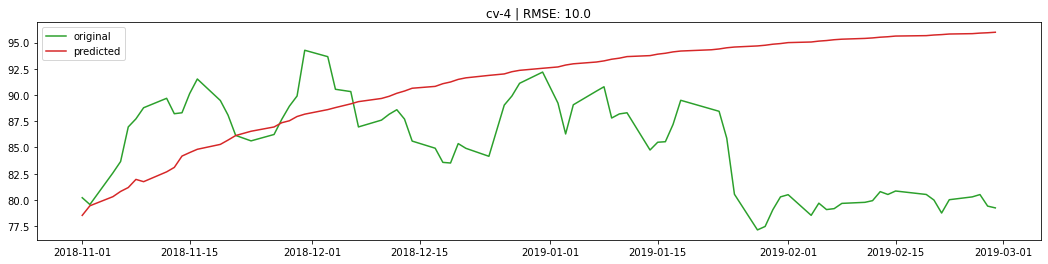

In [58]:
plt.figure(figsize=(18, 4))
plt.plot(ts_2019[:'2018-10-31'])
plt.plot(ts_2019['2018-11-01':])
plt.show();

model_ar = ARIMA(ts_2019[:'2018-10-31'], order=(12, 0, 2)).fit()
yhat = model_ar.forecast(len(ts_2019['2018-11-01':]))[0]

df_results = ts_2019['2018-11-01':].copy()
df_results['yhat'] = yhat

plt.figure(figsize=(18, 4))
plt.title(f'cv-{i} | RMSE: {round(mean_squared_error(yhat, ts_2019["2018-11-01":])**(1/2))}')
plt.plot(df_results.iloc[:, 0], color='C2', label='original')
plt.plot(df_results.iloc[:, 1], color='C3', label='predicted')
plt.legend()
plt.show();

/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


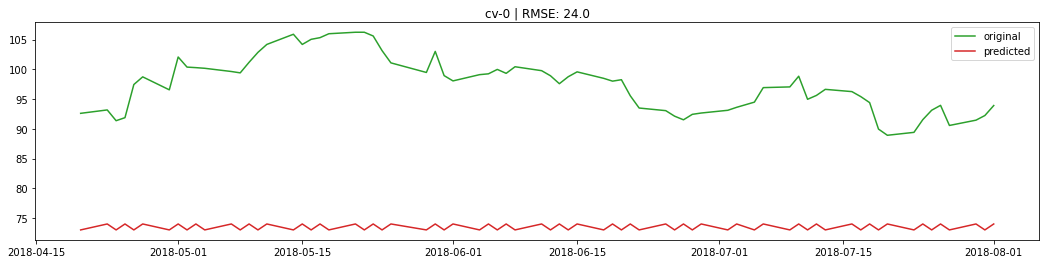

/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


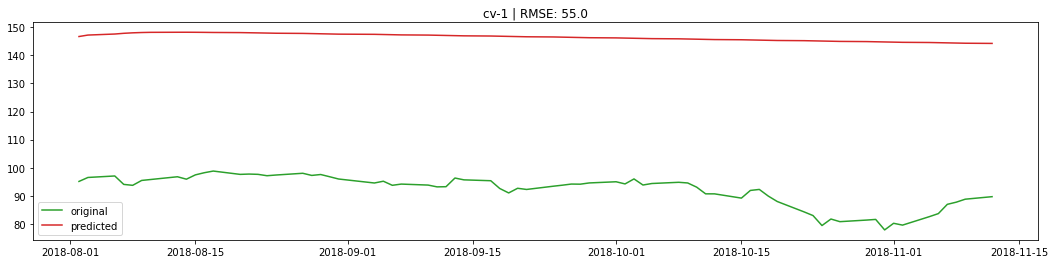

/home/andrei_c/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


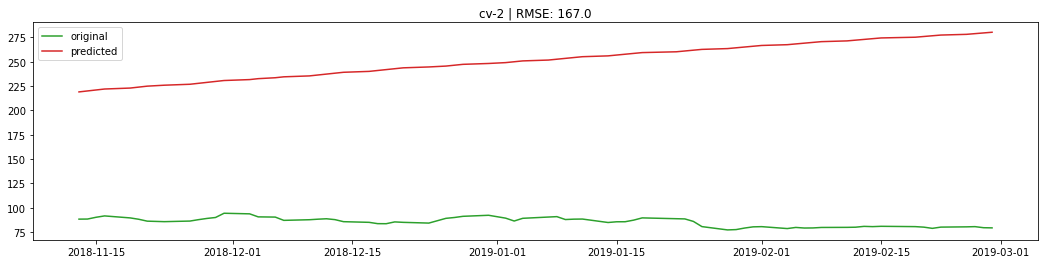

In [44]:
tscv = TimeSeriesSplit(n_splits=3) # gap=40, test_size=90, max_train_size=40
train_sets = tscv.split(ts_2019)

for i, (train, test) in enumerate(train_sets): 
         
    model_ar = ARIMA(train, order=(2, 0, 0)).fit()
    yhat = model_ar.forecast(len(test))[0]
    
    df_results = ts_2019.iloc[test, :].copy()
    df_results['yhat'] = yhat
        
    plt.figure(figsize=(18, 4))
    plt.title(f'cv-{i} | RMSE: {round(mean_squared_error(yhat, ts_2019.iloc[test, 0])**(1/2))}')
    plt.plot(df_results.iloc[:, 0], color='C2', label='original')
    plt.plot(df_results.iloc[:, 1], color='C3', label='predicted')
    plt.legend()
    plt.show();

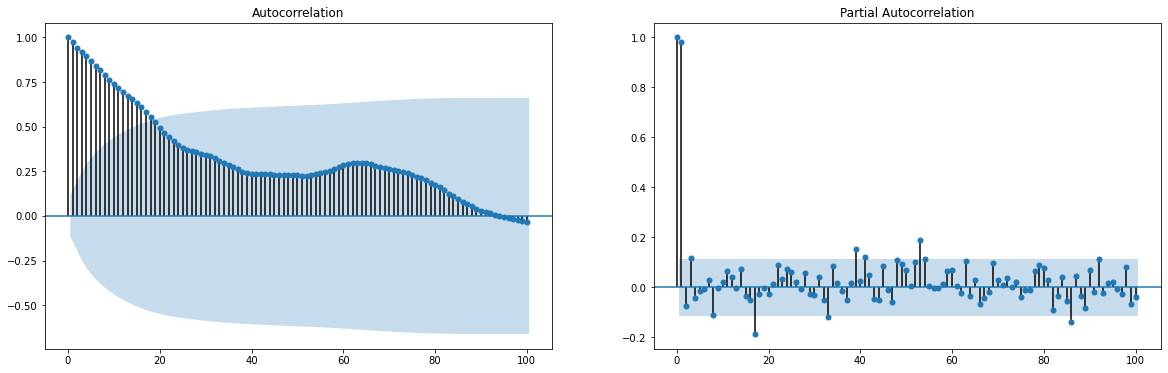

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plot_acf(ts_2019, lags=100, ax=ax[0])
plot_pacf(ts_2019, lags=100, method='ols', ax=ax[1])
plt.show()

In [56]:
order_ = (0, 0, 0);
s = 0
for i in range(0, 5):
    for j in range(0, 3):
        for k in range(0, 5):
            print((i, j, k))
            s += 1

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)
(4, 2, 0)
(4, 2, 1)
(4, 2, 2)
(4, 2, 3)
(4, 2, 4)


In [57]:
s

75